In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

from QuantumCircuit import QuantumCircuit
import numpy as np

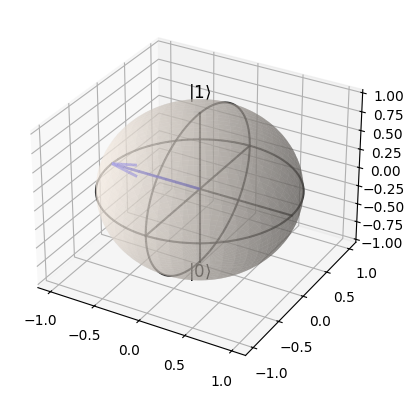

In [2]:
qc = QuantumCircuit(1)
# qc.h(0)
qc.x(0)
qc.rx(np.pi/2, 0)
qc.rz(np.pi/2, 0)
qc.execute()
qc.bloch(3)

In [3]:
# Directly from ../tests/qc_tests.py
qc = QuantumCircuit(2)
qc.x(1)
qc.h([0, 1])
balanced_f = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 0, 1],
                       [0, 0, 1, 0]], dtype=complex)

qc.add_layer(balanced_f, -1)
qc.h([0, 1])
qc.execute()
probabilities = qc.measure_combined_probabilities(qc.state, 1)
assert np.isclose(probabilities[0], 1), f"Probabilities mismatch: {probabilities}"

In [8]:
num_qubits = 2  # Example with 3 qubits
gc = QuantumCircuit(num_qubits)

# Superimpose all qubits with H-gate
gc.h([0,1])
gc.cz(0,1)
gc.h([0,1])
gc.z([0,1])
gc.cz(0,1)
gc.h([0,1])

# Execute the qc
qc.execute()

# Display the results
for i, state in enumerate(qc.state_history):
    print(f"Step {i + 1}: {state}")

print("Final state vector:", qc.state)
print("Measured probabilities:", qc.measure())


Step 1: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Step 2: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Step 3: [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
Step 4: [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
Step 5: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Final state vector: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Measured probabilities: {'01': 0.9999999999999956}


In [9]:
num_qubits = 2
gc = QuantumCircuit(num_qubits)

# Step 1: Apply Hadamard gates to all qubits
gc.h([0, 1])

# Step 2: Oracle to mark |11⟩
oracle = np.eye(2**num_qubits, dtype=complex)
oracle[-1, -1] *= -1  # Flip the phase of |11⟩
gc.add_layer(oracle, -1)

# Step 3: Diffusion Operator
# Apply Hadamard gates to all qubits
gc.h([0, 1])

# Apply Z gate to all qubits except the |00⟩ state
diffusion = np.eye(2**num_qubits, dtype=complex)
diffusion[0, 0] = -1  # Flip the phase of |00⟩
gc.add_layer(diffusion, -1)

# Apply Hadamard gates again to all qubits
gc.h([0, 1])

# Execute the circuit
gc.execute()

# Display the results
for i, state in enumerate(gc.state_history):
    print(f"Step {i + 1}: {state}")

print("Final state vector:", gc.state)
print("Measured probabilities:", gc.measure())


Step 1: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Step 2: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
Step 3: [ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]
Step 4: [ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]
Step 5: [-0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]
Step 6: [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
Final state vector: [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
Measured probabilities: {'11': 0.9999999999999987}


In [5]:
gc.gate_queue

array([], shape=(0, 4, 4), dtype=complex128)